# Distributions

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import proplot as pplt

sys.path.append("..")
import psdist as ps
import psdist.visualization as psv

In [2]:
pplt.rc["cmap.discrete"] = False
pplt.rc["cmap.sequential"] = "mono"
pplt.rc["figure.facecolor"] = "white"
pplt.rc["grid"] = False

In [3]:
def plot_dist_2d(dist, n=10000, xmax=4.0, res=200):
    x = dist.sample(n)

    coords = 2 * [np.linspace(-xmax, xmax, res)]
    x_grid = ps.image.get_grid_coords(*coords)
    prob = dist.prob(x_grid).reshape((res, res))

    fig, axs = pplt.subplots(ncols=2)
    psv.cloud.plot2d(x, bins=100, limits=(2 * [(-xmax, xmax)]), ax=axs[0], mask=False)
    psv.image.plot2d(prob, coords=coords, ax=axs[1])
    return axs

## 2D

In [ ]:
names = [
    "gaussian",
    "waterbag",
]

In [4]:
def plot_dist_2d(dist, n=10000, xmax=3.5, res=200):
    x = dist.sample(n)

    coords = 2 * [np.linspace(-xmax, xmax, res)]
    x_grid = ps.image.get_grid_coords(*coords)
    prob = dist.prob(x_grid).reshape((res, res))

    fig, axs = pplt.subplots(
        ncols=2, figheight=2.0, space=0.0, xspineloc="neither", yspineloc="neither"
    )
    psv.cloud.plot2d(x, bins=100, limits=(2 * [(-xmax, xmax)]), ax=axs[0], mask=False)
    psv.image.plot2d(prob, coords=coords, ax=axs[1])
    return axs

gaussian


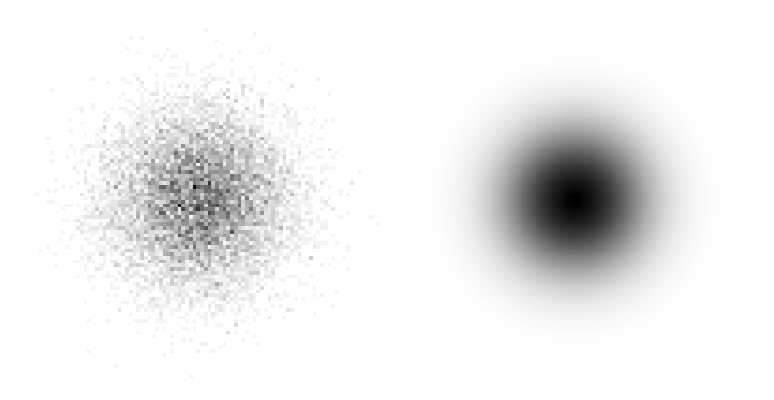

waterbag


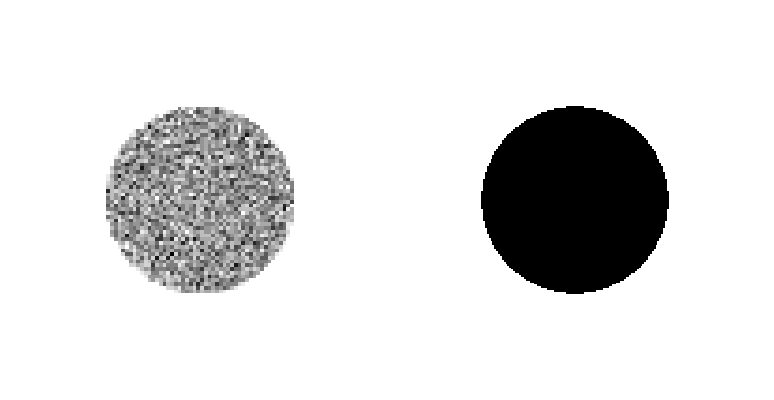

In [5]:
for name in names:
    print(name)
    dist = ps.distributions.gen_dist(name=name, d=2)
    axs = plot_dist_2d(dist, n=10000, xmax=4.0, res=200)
    plt.show()

### 4D 

In [6]:
def plot_dist_corner(dist, n=100000, xmax=3.5, res=45):
    d = dist.d

    x = dist.sample(n)

    coords = dist.d * [np.linspace(-xmax, xmax, res)]
    x_grid = ps.image.get_grid_coords(*coords)
    prob = dist.prob(x_grid).reshape(tuple(d * [res]))

    grid = psv.CornerGrid(d=d, figwidth=(5.0 * (d / 4)), corner=False)
    grid.plot_cloud(x, bins=75, limits=(d * [(-xmax, xmax)]), upper=False, diag=True)
    grid.plot_image(prob, coords=coords, lower=False, diag=True)
    grid.axs.format(xticklabels=[], yticklabels=[])
    return grid

d = 3
gaussian


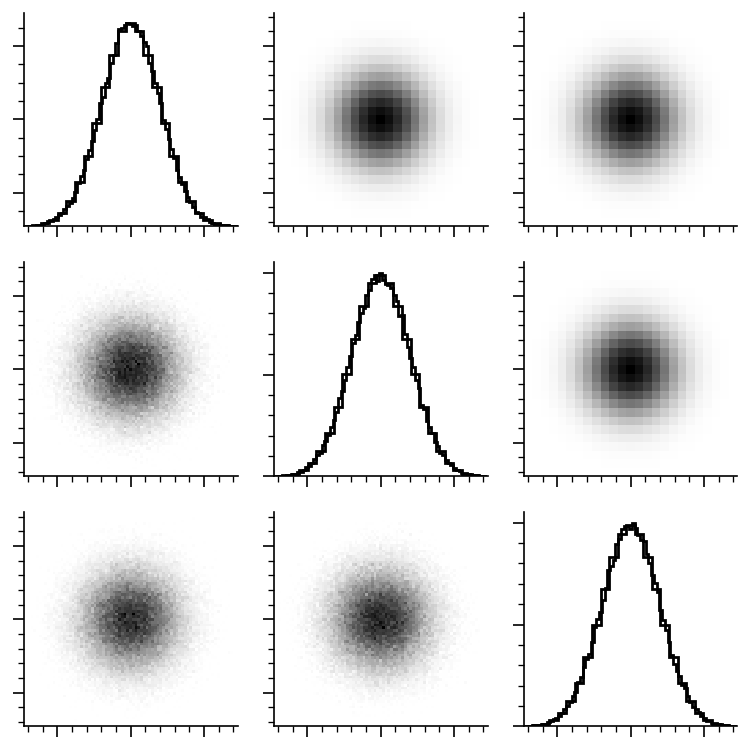

waterbag


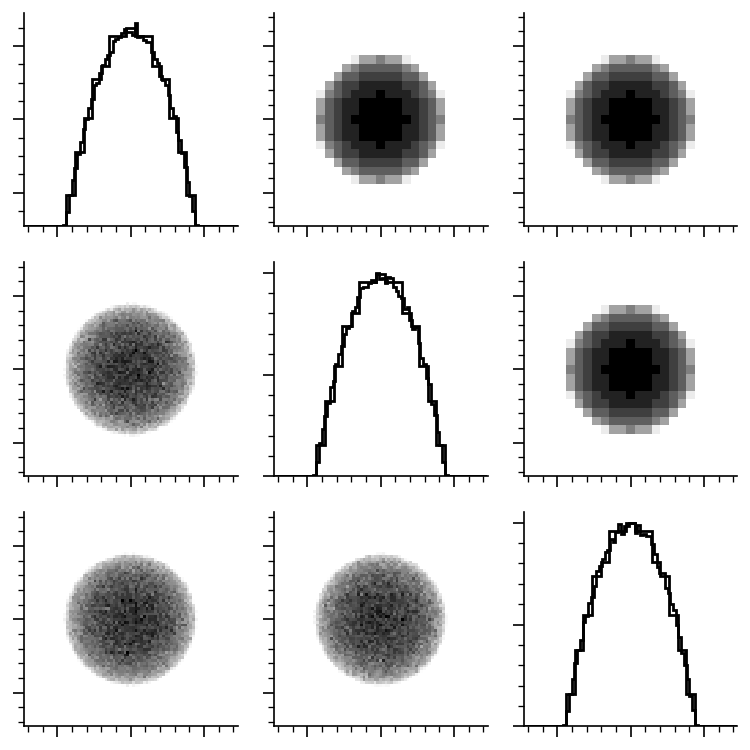

d = 4
gaussian


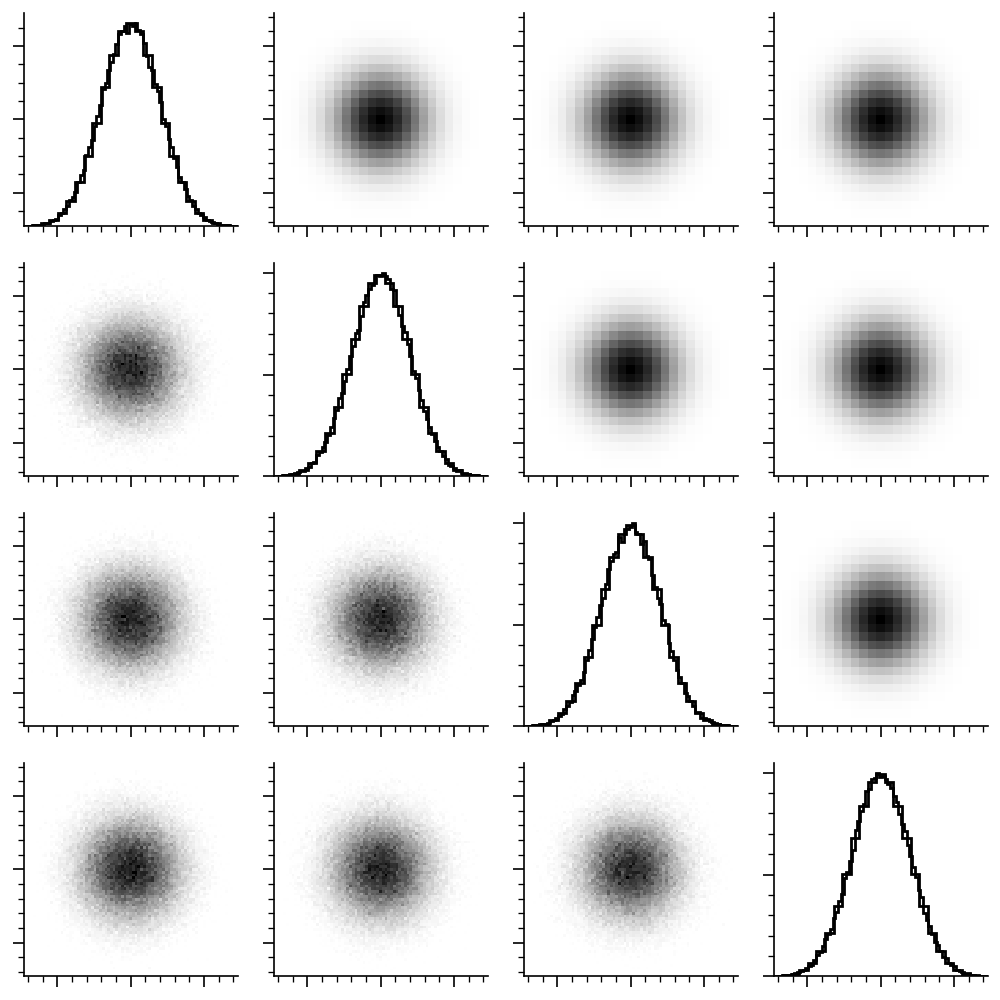

waterbag


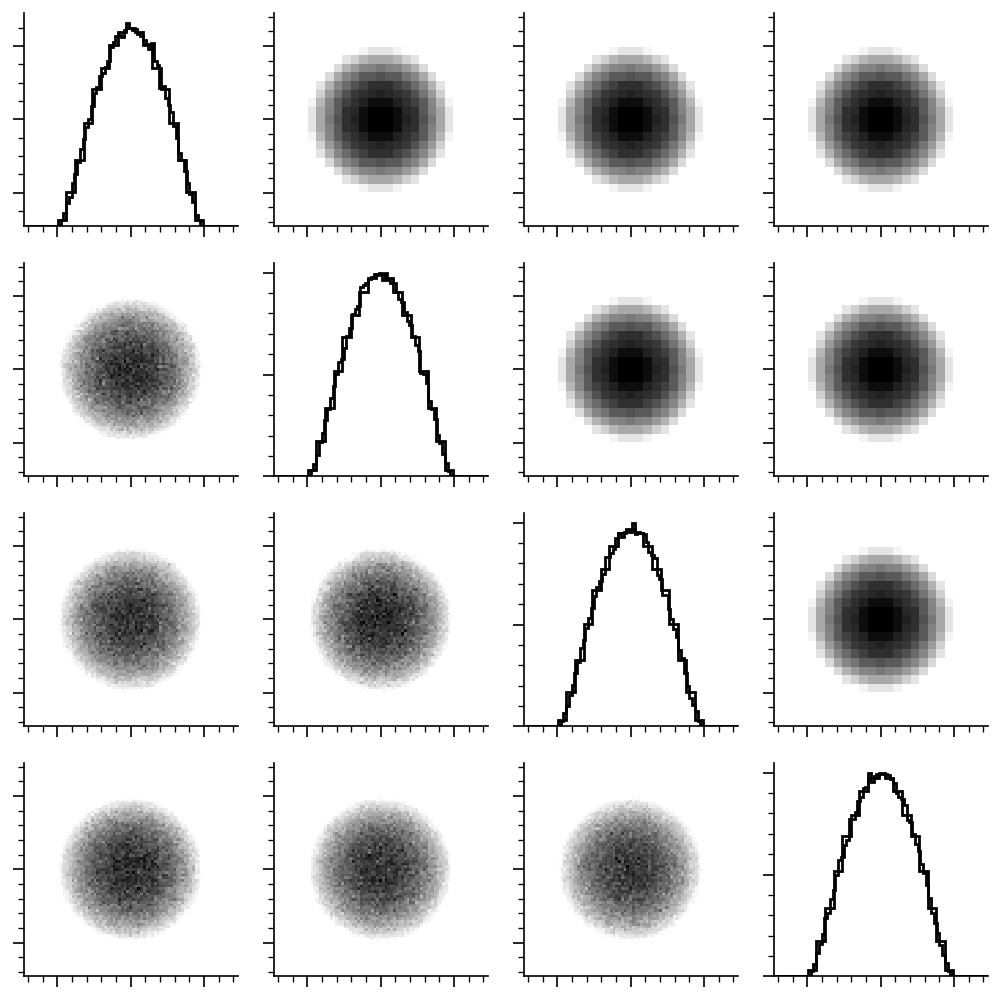

d = 5
gaussian


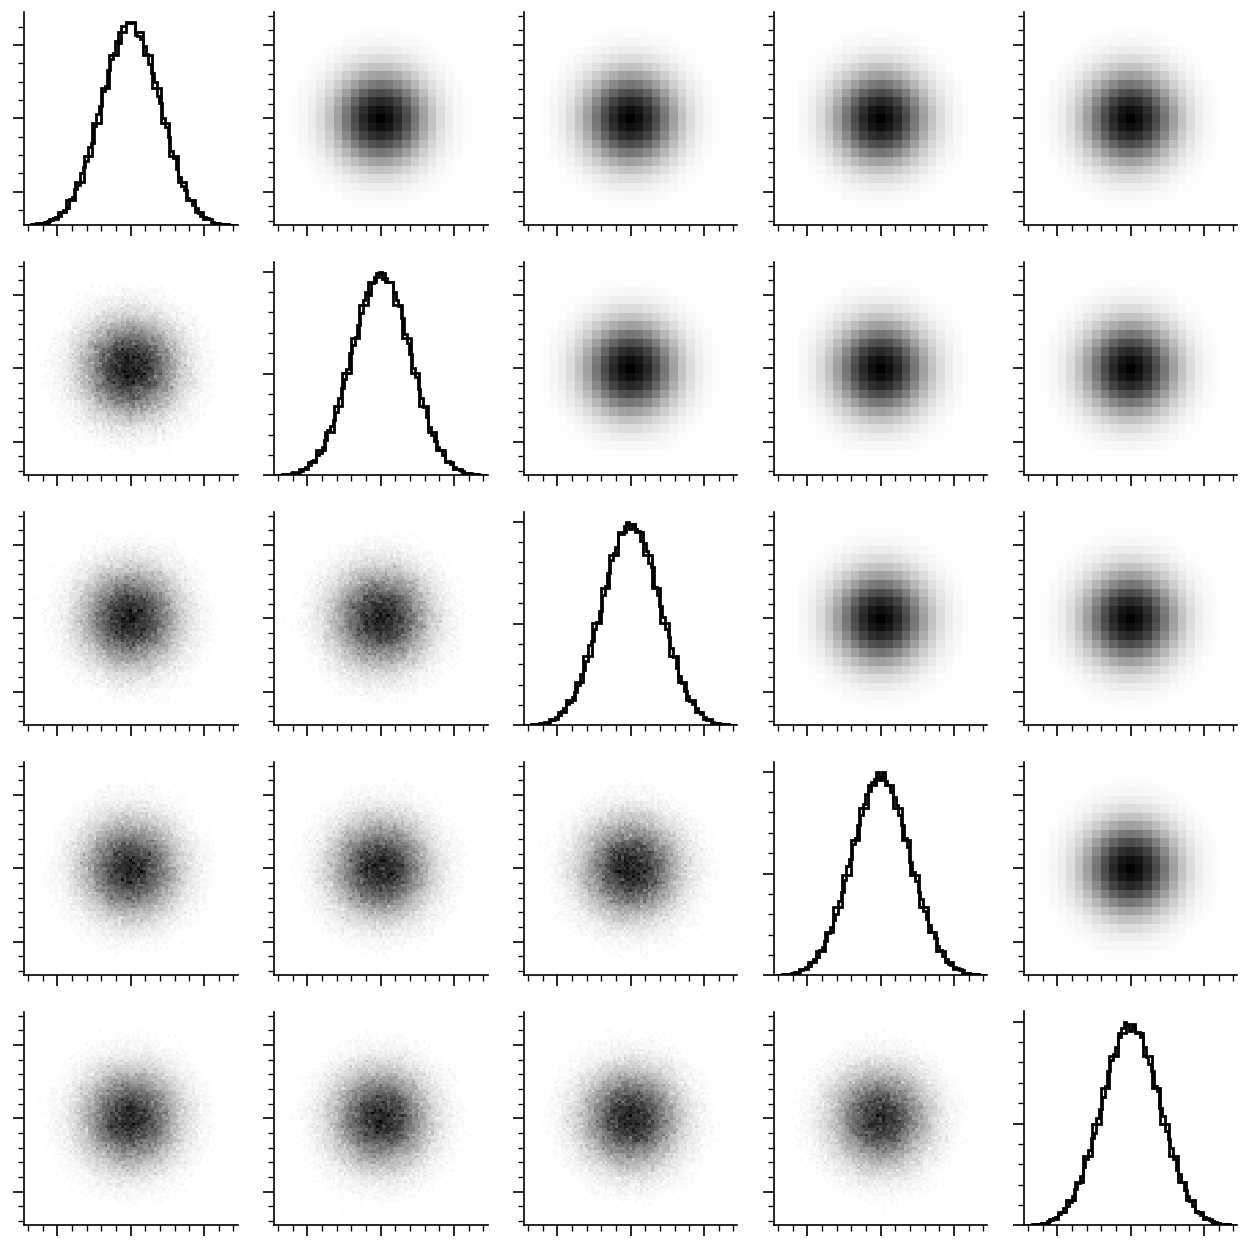

waterbag


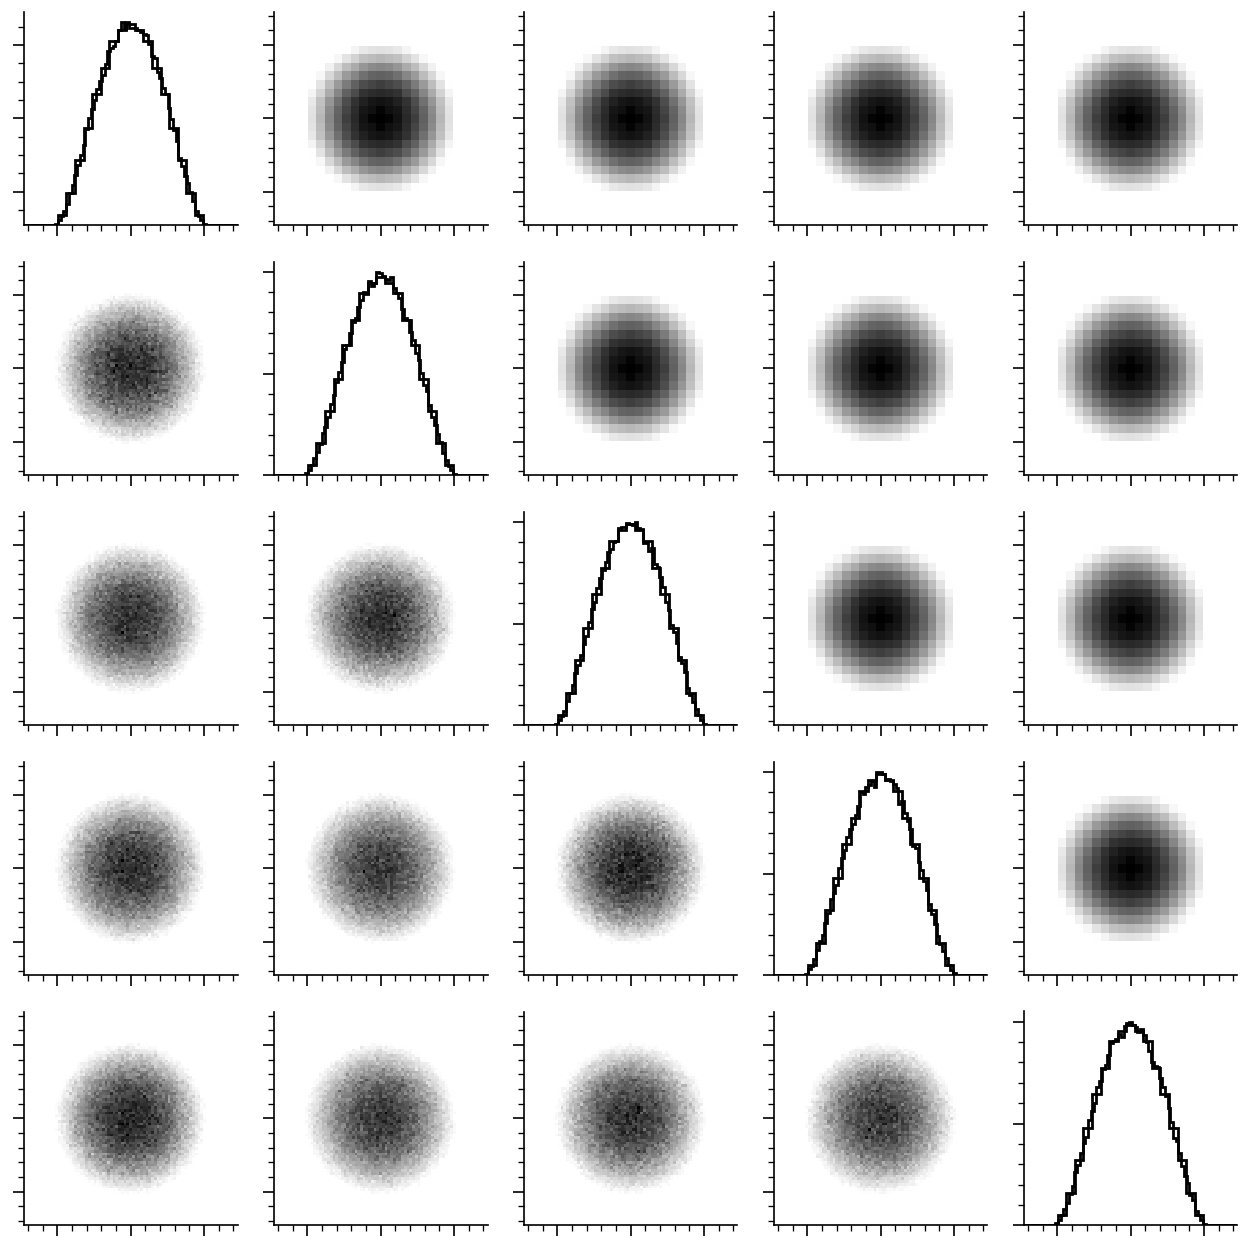

In [7]:
for d in [3, 4, 5]:
    print(f"d = {d}")
    for name in names:
        print(name)
        dist = ps.distributions.gen_dist(name=name, d=d)
        grid = plot_dist_corner(dist, res=25)
        plt.show()